<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/hw3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Limits & Continuity

Limits are a powerful tool in the world of applied mathematics and data science. Limits describe the behavior of continuous functions at a certain point. When describing functions on the Euclidean plane, the **Euclidean norm** , formally defined as: $ ||\mathbf{x}|| = \sqrt{\sum_{i=1}^{d} x_i^2} \text{ for } \mathbf{x} = (x_1, \dots, x_d)^T \in \mathbb{R}^d.$ measures the distance between points in Euclidean space. The Euclidean norm has many applications, such as a loss function in machine learning. However, in terms of limits and continuity, it lays down the building blocks for a concept like the **open r-ball**, which is the set of all points within a radius $r$ from a point in space. This is defined as:
$$
B_r(x) = \{ y \in \mathbb{R}^d : ||y - x|| < r \}
$$

where,
- $x$ is the center of the open r-ball
- $r$ is the radius of the ball
- $||\mathbf{y-x}||$ is the Euclidean distance between x & y

Furthermore, a point $ x \in \mathbb{R}^d $ in the set $ A $, $ A \subseteq \mathbb{R}^d $, is considered a limit point (or accumulation point) when it contains a point from $ A $ that is not equal to itself in every open ball around it. This set $ A $ is considered to be open if for every point $ x \in A $, there exists an open ball $  B_r(x) \subseteq A $ , $ B_r(x) = \{ y \in \mathbb{R}^d : ||y - x|| < r \}. $ Additionally, if there exists an $ r > 0 $ such that $ A \subseteq B_r(0) $, where $ 0 = (0, \dots, 0)^T $ then this set is said to be bounded.

These concepts of open sets, bounded sets, and limit points help describe the behavior of functions when discussing limits. In particular, open balls are useful for understanding how close input values are to the points of interest, allowing us to define the limit of a function.








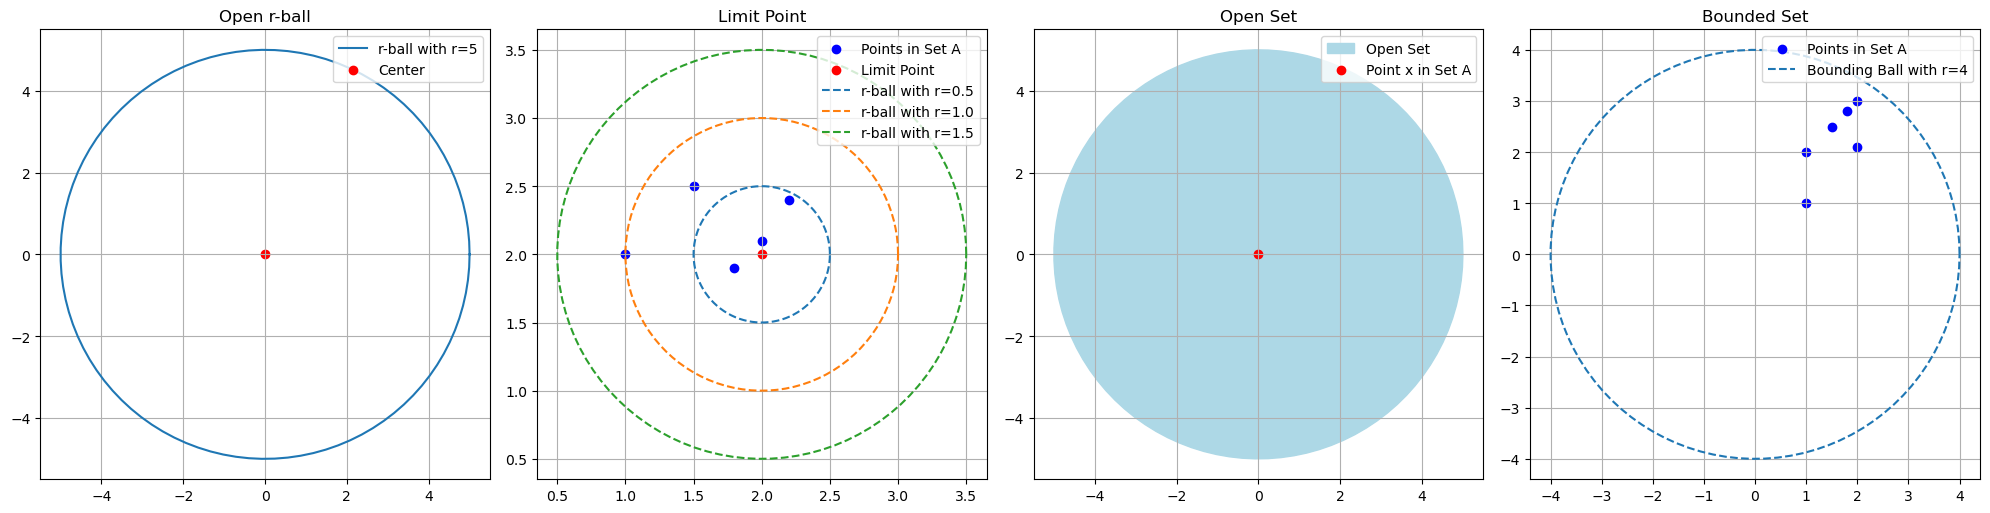

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Setup for side-by-side plots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Open r-ball Visualization

def plot_open_ball(ax, center, radius):
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = center[0] + radius * np.cos(theta)
    y_circle = center[1] + radius * np.sin(theta)

    ax.plot(x_circle, y_circle, label=f"r-ball with r={radius}")
    ax.scatter(center[0], center[1], color="red", label="Center")
    ax.set_title("Open r-ball")
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend(loc='upper right')

plot_open_ball(axs[0], [0, 0], 5)


# Limit Point Visualization

def plot_limit_point(ax, points, limit_point):
    ax.scatter(*zip(*points), color='blue', label="Points in Set A")
    ax.scatter(limit_point[0], limit_point[1], color='red', label="Limit Point")

    # Draw multiple open balls around the limit point
    radii = [0.5, 1.0, 1.5]
    for radius in radii:
        theta = np.linspace(0, 2 * np.pi, 100)
        x_circle = limit_point[0] + radius * np.cos(theta)
        y_circle = limit_point[1] + radius * np.sin(theta)
        ax.plot(x_circle, y_circle, linestyle='--', label=f"r-ball with r={radius}")

    ax.set_title("Limit Point")
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend(loc='upper right')

# points for limit point
points = [(1, 2), (1.5, 2.5), (2, 2.1), (1.8, 1.9), (2.2, 2.4)]
limit_point = (2, 2)
plot_limit_point(axs[1], points, limit_point)


# Open Set Visualization

def plot_open_set(ax, center, radius):
    # Create a grid of points and mark the open set
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = center[0] + radius * np.cos(theta)
    y_circle = center[1] + radius * np.sin(theta)

    # Plot the open set
    ax.fill(x_circle, y_circle, color='lightblue', label="Open Set")

    # Mark some points within the set
    ax.scatter(center[0], center[1], color="red", label="Point x in Set A")

    ax.set_title("Open Set")
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend(loc='upper right')

plot_open_set(axs[2], [0, 0], 5)
# Bounded Set Visualization

def plot_bounded_set(ax, points, center, radius):
    ax.scatter(*zip(*points), color='blue', label="Points in Set A")

    # Draw the bounding ball around the origin
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = center[0] + radius * np.cos(theta)
    y_circle = center[1] + radius * np.sin(theta)

    ax.plot(x_circle, y_circle, linestyle='--', label=f"Bounding Ball with r={radius}")
    ax.set_title("Bounded Set")
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend(loc='upper right')

# points for bounded set
bounded_points = [(1, 2), (2, 3), (1.5, 2.5), (2, 2.1), (1, 1), (1.8, 2.8)]
plot_bounded_set(axs[3], bounded_points, [0, 0], 4)

# Display all plots
plt.tight_layout()
plt.show()


A **Limit of a function** is formally defined as $\lim_{x \to a} f(x) = L $. This means that as $x $ gets closer to the value $a $, the function $f(x) $ gets closer to the limit $L $. We can quantify how close $f(x) $ is to $L $ by defining a small value $\epsilon > 0 $, and then finding a distance $\delta > 0 $ such that for all $x $ within this distance of $a $ (but not equal to $a $), the value of $f(x) $ will be within $\epsilon $ of $L $. This relationship helps us control how close the outputs of the function get to the limit. Formally, for every $\epsilon > 0 $ (which describes how close $f(x) $ should be to $L $), there exists a $\delta > 0 $ such that whenever $0 < ||x - a|| < \delta $, we have $|f(x) - L| < \epsilon $ for all $x \in D \cap B_\delta(a) \setminus \{a\} $.

This function is **continuous** if  $ \lim_{x \to a} f(x) = f(a) $, where  $ f : D \to \mathbb{R} $ and $ D \subseteq \mathbb{R}^d $. This means that as $ x $ gets close to $ a $, the value of $ f(x) $ gets close to $ f(a) $.

What if we want to examine the maximum or minimum value of a function. This is formally know as **Extremum**. A function $ f $ is said to reach a **maximum value** $ M $ at a point $ z^* $ if: $ f(z^*) = M \quad \text{and} \quad M \geq f(x) \quad \text{for all} \quad x \in D. $ Similarly, $ f $ reaches a **minimum value** $ m $ at a point $ z_t $ if  $ f(z_t) = m \quad \text{and} \quad m \leq f(x) \quad \text{for all} \quad x \in D $

Closely related, is the Extreme value theorem. The Extreme Value Theorem states that if a function is continuous and defined on a set that is closed and bounded, then it will have both a maximum and a minimum value somewhere on that set. This is formally defined as: Let $ f : D \to \mathbb{R} $ be a real-valued, continuous function on a nonempty, closed, bounded set $ D \subseteq \mathbb{R}^d $. Then $ f $ attains a maximum and a minimum on $ D $.

Lastly, we can have a **Composition of Continuous Function**. This means that if $ f $ and $ g $ are both continuous, then their composition $ g(f(x)) $ is also continuous at the relevant points.


/tmp/ipykernel_521709/3270981620.py:23: RuntimeWarning: invalid value encountered in divide
  return (x**2 - 1) / (x - 1)


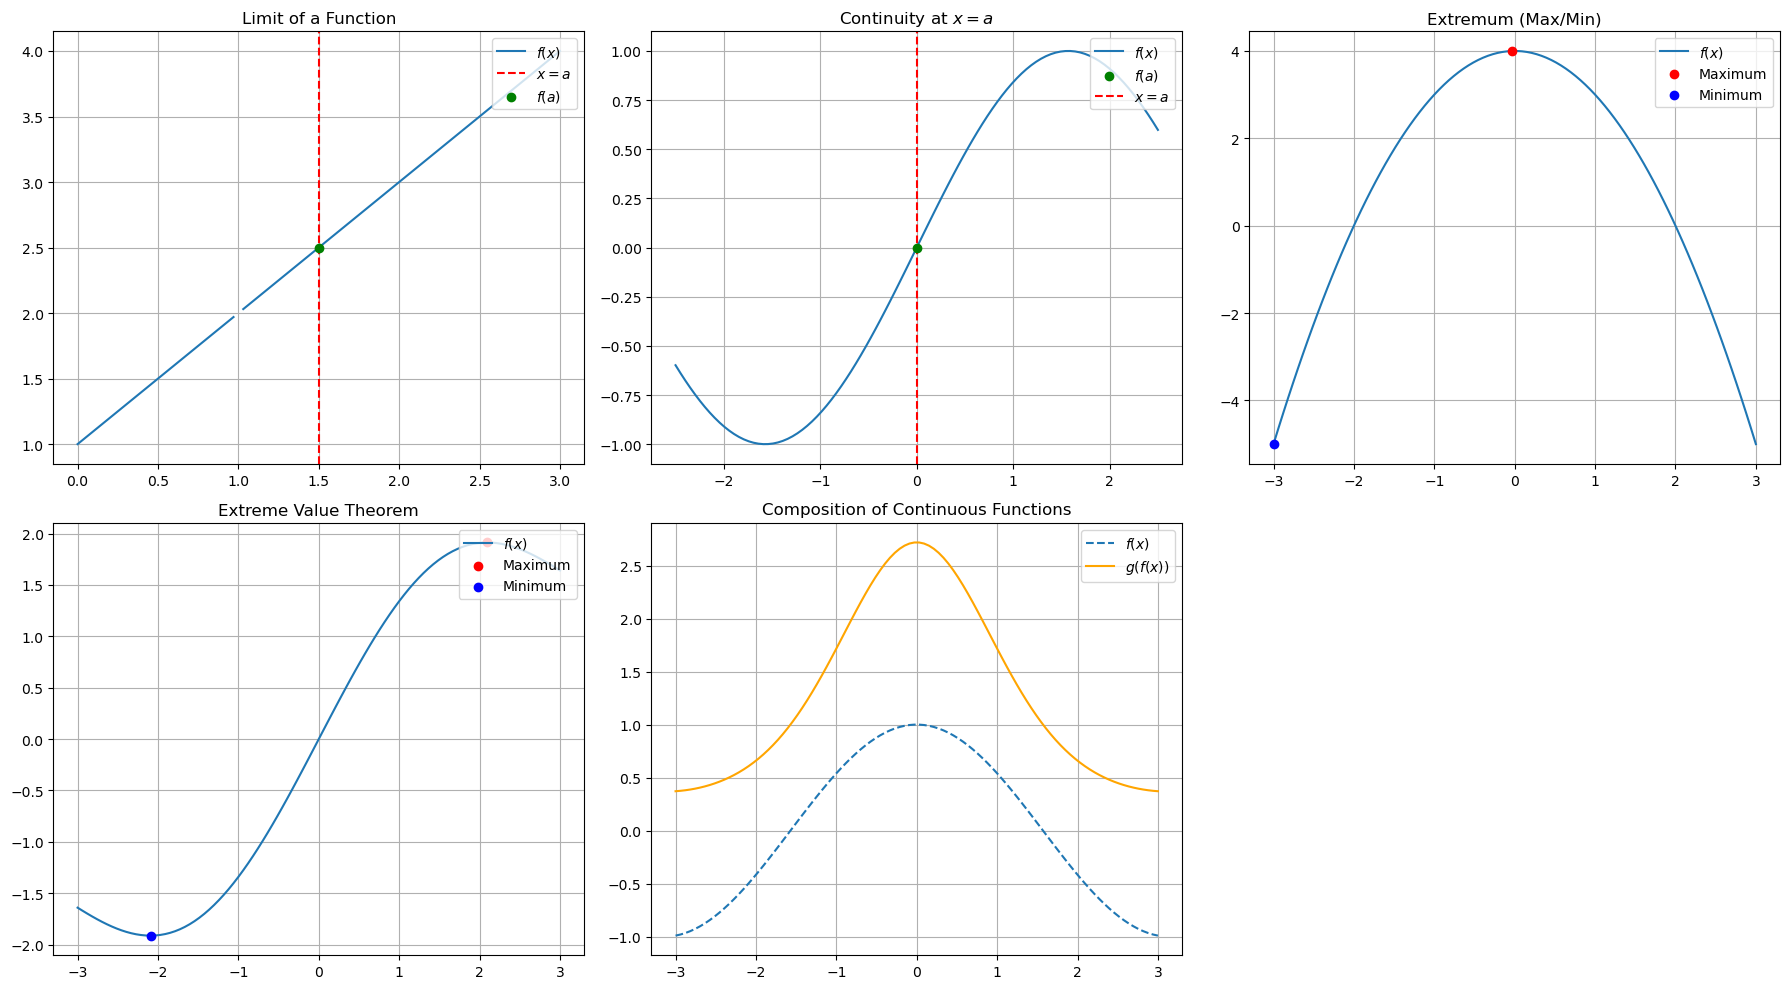

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Limit of a Function

def plot_limit(ax, f, a, delta_range):
    x_values = np.linspace(a - delta_range, a + delta_range, 100)
    y_values = f(x_values)

    # Plot the function
    ax.plot(x_values, y_values, label=r"$f(x)$")
    ax.axvline(x=a, color='red', linestyle='--', label=r"$x = a$")

    # Highlight the limit point
    ax.scatter(a, f(a), color='green', zorder=5, label=r"$f(a)$")

    ax.set_title("Limit of a Function")
    ax.legend(loc="upper right")
    ax.grid(True)

# Example function for limit
def f_limit(x):
    return (x**2 - 1) / (x - 1)


# Continuity of a Function
def plot_continuity(ax, f, a, delta_range):
    x_values = np.linspace(a - delta_range, a + delta_range, 100)
    y_values = f(x_values)

    ax.plot(x_values, y_values, label=r"$f(x)$")
    ax.scatter(a, f(a), color='green', zorder=5, label=r"$f(a)$")
    ax.axvline(x=a, color='red', linestyle='--', label=r"$x = a$")

    ax.set_title("Continuity at $x = a$")
    ax.legend(loc="upper right")
    ax.grid(True)

# Continuous function example
def f_continuous(x):
    return np.sin(x)


#  Extremum (Maximum and Minimum)

def plot_extremum(ax, f, x_range):
    x_values = np.linspace(*x_range, 100)
    y_values = f(x_values)

    ax.plot(x_values, y_values, label=r"$f(x)$")

    # Find maximum and minimum
    max_index = np.argmax(y_values)
    min_index = np.argmin(y_values)
    ax.scatter(x_values[max_index], y_values[max_index], color="red", zorder=5, label="Maximum")
    ax.scatter(x_values[min_index], y_values[min_index], color="blue", zorder=5, label="Minimum")

    ax.set_title("Extremum (Max/Min)")
    ax.legend(loc="upper right")
    ax.grid(True)

# Function with maximum and minimum
def f_extremum(x):
    return -x**2 + 4


#  Extreme Value Theorem

def plot_evt(ax, f, x_range):
    x_values = np.linspace(*x_range, 100)
    y_values = f(x_values)

    ax.plot(x_values, y_values, label=r"$f(x)$")


    max_index = np.argmax(y_values)
    min_index = np.argmin(y_values)
    ax.scatter(x_values[max_index], y_values[max_index], color="red", zorder=5, label="Maximum")
    ax.scatter(x_values[min_index], y_values[min_index], color="blue", zorder=5, label="Minimum")

    ax.set_title("Extreme Value Theorem")
    ax.legend(loc="upper right")
    ax.grid(True)

# function example for EVT
def f_evt(x):
    return np.sin(x) + 0.5 * x


# Composition of Continuous Functions

def plot_composition(ax, f, g, x_range):
    x_values = np.linspace(*x_range, 100)
    y_values_f = f(x_values)
    y_values_composed = g(f(x_values))

    # Plot f(x)
    ax.plot(x_values, y_values_f, label=r"$f(x)$", linestyle="--")

    # Plot g(f(x)) which is the composition
    ax.plot(x_values, y_values_composed, label=r"$g(f(x))$", color="orange")

    ax.set_title("Composition of Continuous Functions")
    ax.legend(loc="upper right")
    ax.grid(True)

# Example functions for composition
def f_comp(x):
    return np.cos(x)

def g_comp(y):
    return np.exp(y)


fig, axs = plt.subplots(2, 3, figsize=(18, 10))

plot_limit(axs[0, 0], f_limit, a=1.5, delta_range=1.5)

plot_continuity(axs[0, 1], f_continuous, a=0, delta_range=2.5)

plot_extremum(axs[0, 2], f_extremum, x_range=(-3, 3))

plot_evt(axs[1, 0], f_evt, x_range=(-3, 3))

plot_composition(axs[1, 1], f_comp, g_comp, x_range=(-3, 3))

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


### Derivatives
Limits open an opportunity for the another tool that allows to measure the rate of change of a function in respect to an input varaible. This is known a functions derivative. This is a critical concept in  optimization because it shows how functions behave locally and help find extremum values. The derivative of a function $f $ in the single variable case is:

$$
f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}
$$
## Properties
The derivative is a **linear operator**, meaning that for any two differentiable functions $ f $ and $ g $, and constants $ \alpha $ and $ \beta $ This property allows us to break down more complex functions into simpler parts. This is defined as:

$$
[\alpha f(x) + \beta g(x)]' = \alpha f'(x) + \beta g'(x)
$$

Additionally, derivatives can tells us whether a function is increasing or decreasing. If $f'(x_0) > 0 $, there exists a region around $ x_0 $ where $ f(x) $ is increasing. Specifically, for all points $ x $ in an open r-ball $ B_\delta(x_0) \subset D $:

- $ f(x) > f(x_0) $ if $ x > x_0 $
- $ f(x) < f(x_0) $ if $ x < x_0 $


#### Rolle's Theorem
If $ f $ is a continuous function on $ [a, b] $, differentiable on $ (a, b) $, and $ f(a) = f(b) $, then there exists a point $a < c< b $ such that $ f'(c) = 0 $. This tells us that there exists a local maximum, minimum, or saddle point within the interval.


#### Mean Value Theorem
The mean value theorem generalizes Rolle's theorem and states that if $ f $ is continuous on $ [a, b] $ and differentiable on $ (a, b) $, then there exists a point $ c, a < c < b $ such that:
$$
\frac{f(b) - f(a)}{b - a} = f'(c)
$$
Essentially, this tells us that the derivate of the function equals the slope between two points a and b.
#### Higher-Order Derivatives
Additionally, you can take derivatives of different orders. For example, here is a second order derivative.
$$
f''(x_0) = \lim_{h \to 0} \frac{f'(x_0 + h) - f'(x_0)}{h}
$$
provided the limit exists.

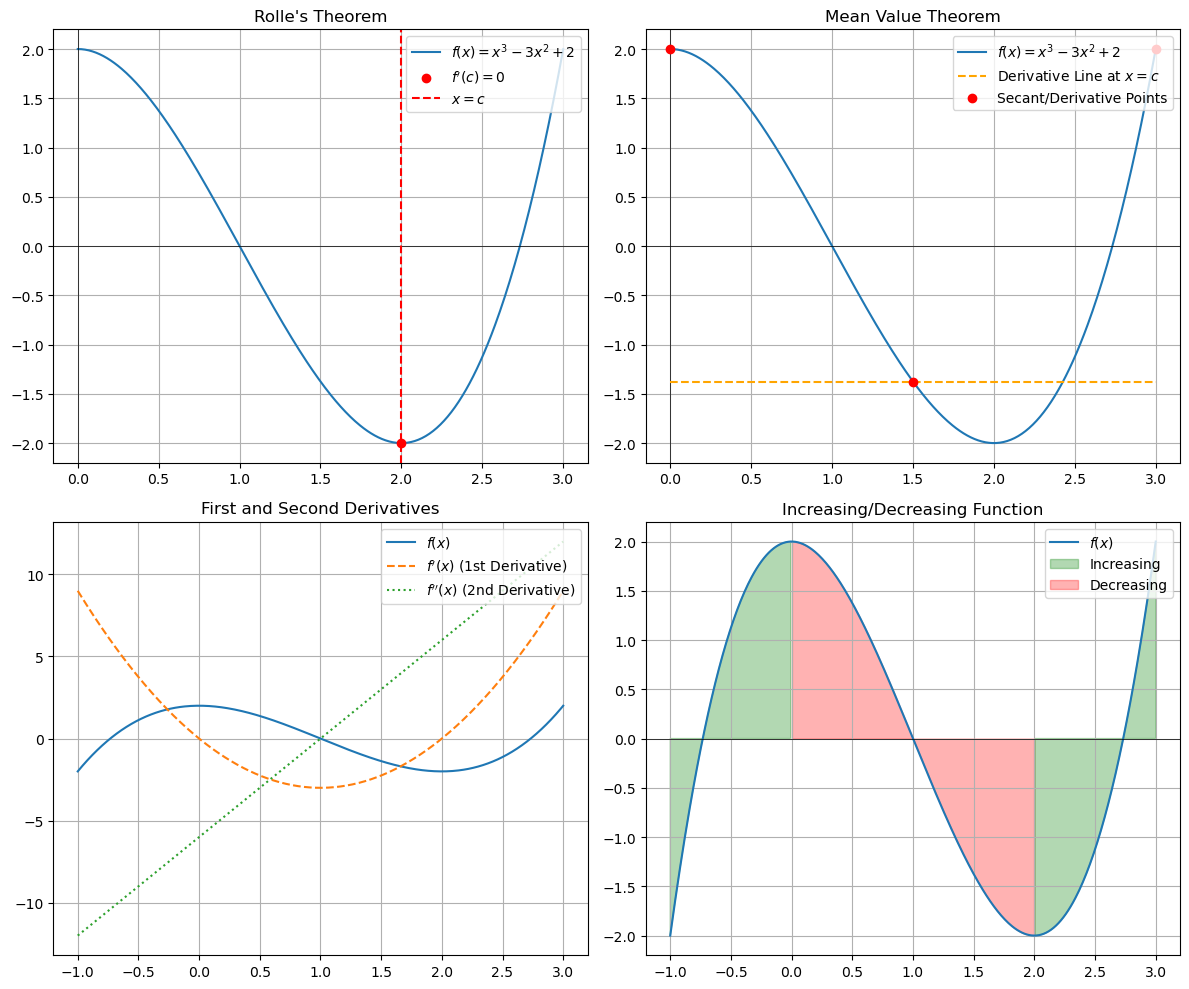

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Derivative Function
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

# Second-order derivative
def second_derivative(f, x, h=1e-5):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

# Function
def f(x):
    return x**3 - 3*x**2 + 2

# Derivative of f(x) for Rolle's and MVT
def f_prime(x):
    return 3*x**2 - 6*x

# Rolle's Theorem Plot
def plot_rolles_theorem(ax):
    x = np.linspace(0, 3, 400)
    y = f(x)

    ax.plot(x, y, label=r"$f(x) = x^3 - 3x^2 + 2$")
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    # Rolle's Theorem point where f'(c) = 0
    c = 2
    ax.scatter(c, f(c), color='red', zorder=5, label=r"$f'(c)=0$")
    ax.axvline(c, linestyle='--', color='red', label=r"$x=c$")

    ax.set_title("Rolle's Theorem")
    ax.legend(loc="upper right")
    ax.grid(True)

# Mean Value Theorem Plot
def plot_mean_value_theorem(ax):
    a, b = 0, 3
    x = np.linspace(a, b, 400)
    y = f(x)

    ax.plot(x, y, label=r"$f(x) = x^3 - 3x^2 + 2$")
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    # Mean Value Theorem
    f_a, f_b = f(a), f(b)
    slope_secant = (f_b - f_a) / (b - a)

    # Line showing the derivative at some c
    c = 1.5
    rate_of_change_line = slope_secant * (x - c) + f(c)

    ax.plot(x, rate_of_change_line, linestyle='--', label="Derivative Line at $x=c$", color="orange")
    ax.scatter([a, b, c], [f_a, f_b, f(c)], color='red', zorder=5, label="Secant/Derivative Points")

    ax.set_title("Mean Value Theorem")
    ax.legend(loc="upper right")
    ax.grid(True)

# First and Second Derivative Plot
def plot_derivatives(ax):
    x = np.linspace(-1, 3, 400)
    y = f(x)
    dy = derivative(f, x)
    d2y = second_derivative(f, x)

    ax.plot(x, y, label=r"$f(x)$")
    ax.plot(x, dy, linestyle='--', label=r"$f'(x)$ (1st Derivative)")
    ax.plot(x, d2y, linestyle=':', label=r"$f''(x)$ (2nd Derivative)")

    ax.set_title("First and Second Derivatives")
    ax.legend(loc="upper right")
    ax.grid(True)

# Visualization of Increasing/Decreasing Function
def plot_increasing_decreasing(ax):
    x = np.linspace(-1, 3, 400)
    y = f(x)
    dy = derivative(f, x)

    ax.plot(x, y, label=r"$f(x)$")
    ax.axhline(0, color='black', linewidth=0.5)

    # Mark regions where the function is increasing or decreasing
    ax.fill_between(x, y, where=(dy > 0), color='green', alpha=0.3, label="Increasing")
    ax.fill_between(x, y, where=(dy < 0), color='red', alpha=0.3, label="Decreasing")

    ax.set_title("Increasing/Decreasing Function")
    ax.legend(loc="upper right")
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plot_rolles_theorem(axs[0, 0])

plot_mean_value_theorem(axs[0, 1])

plot_derivatives(axs[1, 0])

plot_increasing_decreasing(axs[1, 1])

plt.tight_layout()
plt.show()


When dealing with multi-variable functions, something common in data science, we can take a General approach to derivatives. Let's say that you want to measure the rate of change of a function with a multitude of variables $x_0 \dots x_i$ only when dealing with on variable. To achieve this you set the other variables constant and take the derivative of that variable. This is know as the **partial derivative**. It is defined as:

$$
\frac{\partial f(x_0)}{\partial x_i} = \lim_{h \to 0} \frac{f(x_0 + he_i) - f(x_0)}{h}
$$

When dealing with multi-variable functions, something common in data science, we can take a general approach to derivatives. Let's say that you want to measure the rate of change of a function with respect to a specific variable $x_i$, while holding all other variables constant. This is known as the **partial derivative**. It is defined as:

$$
\frac{\partial f(x_0)}{\partial x_i} = \lim_{h \to 0} \frac{f(x_0 + he_i) - f(x_0)}{h}
$$

However, if we have a vector-valued function, we can used a  **Jacobian matrix** to capture the rate of change in all directions at once.
The Jacobian matrix is defined as:
$$
\mathbf{H}_f(x_0) =
\begin{pmatrix}
\frac{\partial f_1(x_0)}{\partial x_1} & \dots & \frac{\partial f_1(x_0)}{\partial x_d} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m(x_0)}{\partial x_1} & \dots & \frac{\partial f_m(x_0)}{\partial x_d}
\end{pmatrix}
$$

However, what if we want to find the rate of change of a function with respect to all the input variables in a multivariable function? This is called a gradient, which is one row of the Jacobian matrix. The gradient is defined as:

$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right)^T
$$


The **chain rule** is a method to calculate the derivative of composite functions. You can calculate this using Jacobian matrixes. If $h(x) = g(f(x))$, and both $f$ and $g$ are differentiable, the derivative is:

$$
J_{g \circ f}(x_0) = J_g(f(x_0)) \cdot J_f(x_0)
$$




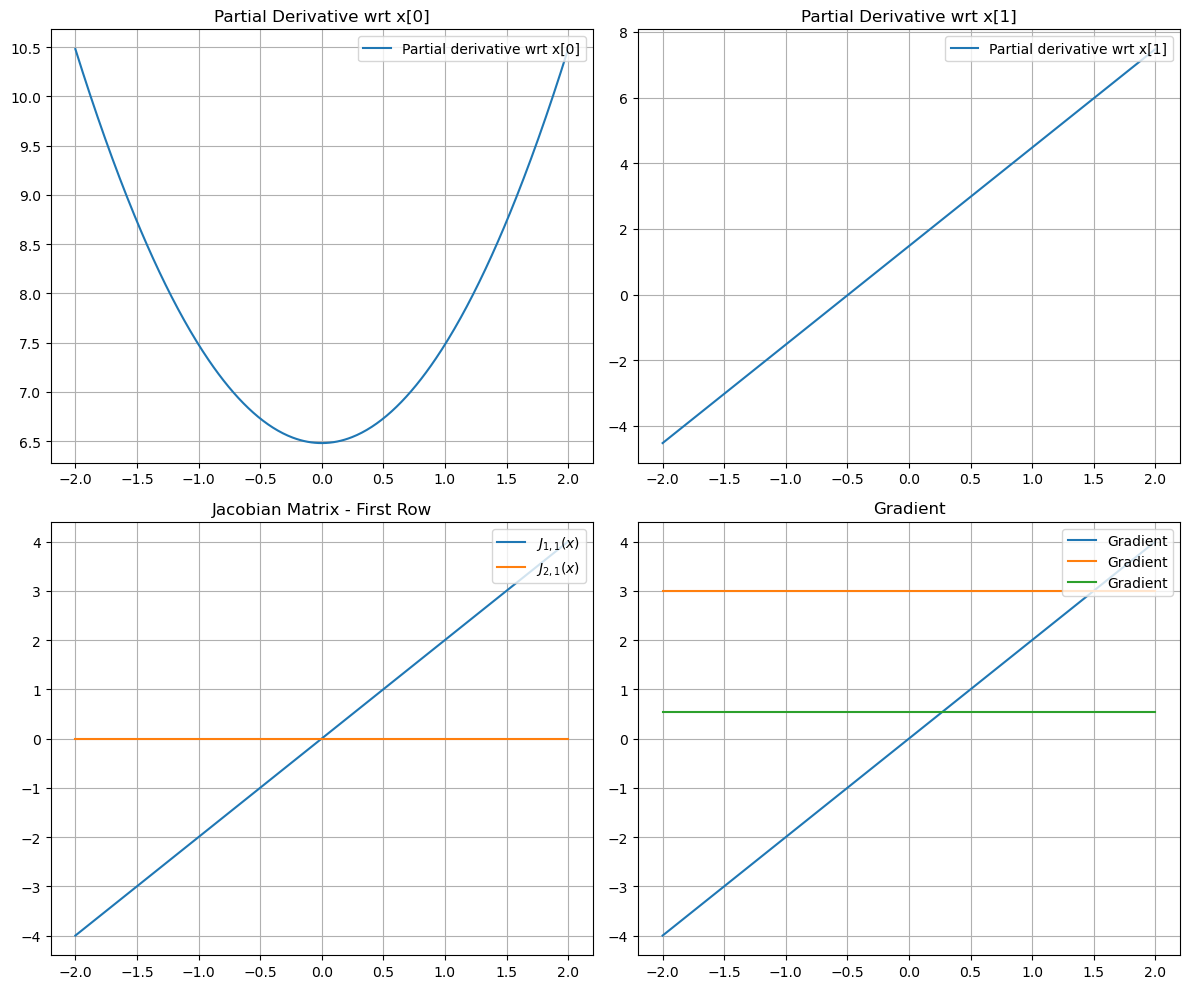

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Partial Derivative
def partial_derivative(f, x, i, h=1e-5):
    x_h = np.copy(x)
    x_h[i] += h
    return (f(x_h) - f(x)) / h

# Jacobian Matrix for Vector-Valued Functions
def jacobian(f, x, h=1e-5):
    n = x.size
    m = f(x).size
    J = np.zeros((m, n))
    for i in range(n):
        x_h = np.copy(x)
        x_h[i] += h
        J[:, i] = (f(x_h) - f(x)) / h
    return J

#  Scalar Function
def scalar_function(x):
    return x[0]**2 + 3*x[1] + np.sin(x[2])

# Vector-Valued Function
def vector_function(x):
    return np.array([x[0]**2 + x[1], x[1]**2 + x[2], np.sin(x[0] * x[2])])

# Gradient (which is a row of the Jacobian for scalar-valued functions)
def gradient(f, x, h=1e-5):
    return jacobian(f, x, h)[0]

# Visualizing Partial Derivatives
def plot_partial_derivatives(ax, func, x0, var_idx):
    x_range = np.linspace(-2, 2, 400)
    x0_values = np.tile(x0, (len(x_range), 1))
    x0_values[:, var_idx] = x_range  # Vary the specified variable
    y_values = np.array([func(x) for x in x0_values])

    ax.plot(x_range, y_values, label=f'Partial derivative wrt x[{var_idx}]')
    ax.set_title(f'Partial Derivative wrt x[{var_idx}]')
    ax.grid(True)
    ax.legend(loc="upper right")

# Visualizing Jacobian Matrix
def plot_jacobian(ax, func, x0):
    x_range = np.linspace(-2, 2, 400)
    jacobians = np.array([jacobian(func, np.array([x, 2.0, 1.0])) for x in x_range])

    ax.plot(x_range, jacobians[:, 0, 0], label=r"$J_{1,1}(x)$")
    ax.plot(x_range, jacobians[:, 1, 0], label=r"$J_{2,1}(x)$")
    ax.set_title("Jacobian Matrix - First Row")
    ax.grid(True)
    ax.legend(loc="upper right")

# Visualization of Gradients
def plot_gradient(ax, func, x0):
    x_range = np.linspace(-2, 2, 400)
    gradients = np.array([gradient(func, np.array([x, 2.0, 1.0])) for x in x_range])

    ax.plot(x_range, gradients, label="Gradient")
    ax.set_title("Gradient")
    ax.grid(True)
    ax.legend(loc="upper right")

# Input point for partial derivatives and Jacobian
x0 = np.array([1.0, 2.0, 0.5])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Partial Derivatives
plot_partial_derivatives(axs[0, 0], scalar_function, x0, var_idx=0)
plot_partial_derivatives(axs[0, 1], scalar_function, x0, var_idx=1)

# Plot Jacobian Matrix visualization
plot_jacobian(axs[1, 0], vector_function, x0)

# Plot Gradient visualization
plot_gradient(axs[1, 1], scalar_function, x0)

plt.tight_layout()
plt.show()


However, it might be helpful in some cases to look at how derivatives act in relation to certain directions. In this case, a **directional derivative** can be used. Let's say that we have a function $f$ and we want to measure how it changes along a direction represented as a vector $v$ we can achieve this by doing:


$$
\frac{\partial f(x_0)}{\partial \mathbf{v}} = \lim_{h \to 0} \frac{f(x_0 + h \mathbf{v}) - f(x_0)}{h}
$$

This can also be calculated using gradients.
$$
\frac{\partial f(x_0)}{\partial \mathbf{v}} = \nabla f(x_0) \cdot \mathbf{v} = J_f(x_0) \mathbf{v}
$$

Additionally, we can extend this to second-order partial derivatives. This can help analyze how a function curves in different directions. Computing all the second-order partial derivatives of a function gives us a Hessian matrix:

$$
\mathbf{H}_f(x_0) =
\begin{pmatrix}
\frac{\partial^2 f(x_0)}{\partial x_1^2} & \dots & \frac{\partial^2 f(x_0)}{\partial x_d \partial x_1 } \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f(x_0)}{ \partial x_1 \partial x_d } & \dots & \frac{\partial^2 f(x_0)}{\partial x_d^2}
\end{pmatrix}

$$

Since the Hessian matrix is composed of second-order partial derivatives, **Symmetry of the Hessian** implies that for twice continuously differentiable functions.This symmetry makes the Hessian matrix a **symmetric matrix**:

$$
\frac{\partial^2 f(x_0)}{\partial x_j \partial x_i} = \frac{\partial^2 f(x_0)}{\partial x_i \partial x_j}
$$



In [ ]:
import numpy as np

# Function f(x) = x^T A x + b^T x
def f(x, A, b):
    return np.dot(x.T, np.dot(A, x)) + np.dot(b.T, x)

# Gradient of the function: 2A * x + b
def gradient_f(x, A, b):
    return 2 * np.dot(A, x) + b

# Hessian matrix: 2A
def hessian_f(A):
    return 2 * A

# Directional derivative: f(x) . v
def directional_derivative(f_grad, x0, v):
    return np.dot(f_grad, v)

# Symmetry check for the Hessian
def check_hessian_symmetry(hessian):
    return np.allclose(hessian, hessian.T)

# Define the matrix A and vector b for the quadratic form
A = np.array([[3, 1], [1, 2]])
b = np.array([1, 1])

# Define point x0 and direction v
x0 = np.array([1, 2])
v = np.array([1, -1])

# Compute gradient and Hessian at x0
grad_f_x0 = gradient_f(x0, A, b)
hessian_f_x0 = hessian_f(A)

# Directional derivative along v
dir_derivative = directional_derivative(grad_f_x0, x0, v)

# Hessian symmetry check
is_symmetric = check_hessian_symmetry(hessian_f_x0)

print(f"Gradient at x0: {grad_f_x0}")
print(f"Hessian matrix at x0:\n{hessian_f_x0}")
print(f"Directional derivative along v: {dir_derivative}")
print(f"Is Hessian symmetric? {is_symmetric}")



Gradient at x0: [11 11]
Hessian matrix at x0:
[[6 2]
 [2 4]]
Directional derivative along v: 0
Is Hessian symmetric? True


**Taylor's Theorem** approximates a differentiable function near a point using a polynomial. It is a generalization of Mean Value Theorem .

For a function $ f(x) $, the second-order Taylor approximation around a point $ a $ for a single-variable case:

$$
f(b) = f(a) + (b - a)f'(a) + \frac{1}{2}(b - a)^2 f''(\xi)
$$

Where $ \xi $ lies between $ a $ and $ b $, and the $ f''(\xi) $ term represents the approximation error.

For multivariable functions, when doing mean value Theorem we generalize the approximation to:

$$
f(x) = f(x_0) + \nabla f(x_0 + \xi_p)^T \mathbf{p}
$$

Where $ \mathbf{p} = x - x_0 $, and $ \xi \in (0, 1) $.


For a twice differentiable multivariable function, the second-order Taylor expansion around $ x_0 $ is:

$$
f(x) = f(x_0) + \nabla f(x_0)^T \mathbf{p} + \frac{1}{2} \mathbf{p}^T H_f(x_0) \mathbf{p} + O(\|\mathbf{p}\|^3)
$$

Where:
- $ \nabla f(x_0) $ is the gradient,
- $ H_f(x_0) $ is the Hessian (second-order partial derivatives matrix),
- $ \mathbf{p} = x - x_0 $.



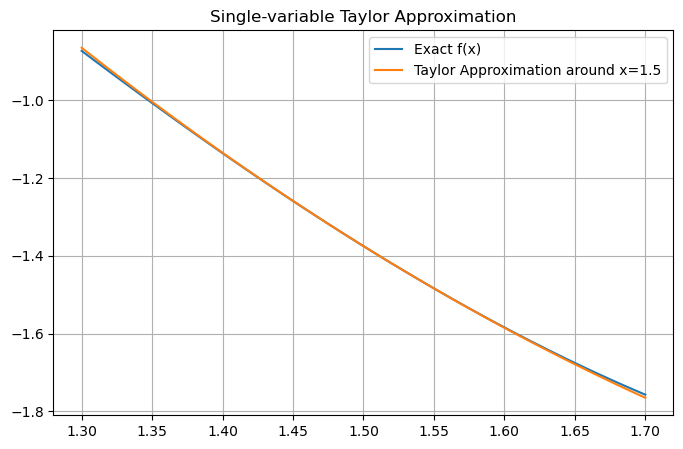

Second-order Taylor approximation for multivariable f(x) at [1.2 1.1]: 5.180000000000001
Exact value for multivariable f(x) at [1.2 1.1]: 5.180000000000001
Mean Value Theorem approximation for multivariable f(x) at [1.2 1.1]: 4.143832412708385


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Single-variable function
def f_single(x):
    return x**3 - 3*x**2 + 2

# First and second derivatives for the single-variable function
def f_prime_single(x):
    return 3*x**2 - 6*x

def f_double_prime_single(x):
    return 6*x - 6

# Multivariable function
def f_multi(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1]

# Gradient of f_multi
def gradient_f_multi(x):
    df_dx1 = 2*x[0] + x[1]
    df_dx2 = 4*x[1] + x[0]
    return np.array([df_dx1, df_dx2])

# Hessian of f_multi
def hessian_f_multi(x):
    d2f_dx1dx1 = 2
    d2f_dx2dx2 = 4
    d2f_dx1dx2 = 1
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

# Taylor approximation for the single-variable function
def taylor_single(x, a):
    return f_single(a) + (x - a) * f_prime_single(a) + 0.5 * (x - a)**2 * f_double_prime_single(a)

# Taylor approximation for the multivariable function
def taylor_multi(x, x0):
    p = x - x0
    grad = gradient_f_multi(x0)
    hessian = hessian_f_multi(x0)

    # First-order term: Gradient
    first_order = np.dot(grad, p)

    # Second-order term: 1/2 * p^T * H * p
    second_order = 0.5 * np.dot(p.T, np.dot(hessian, p))

    return f_multi(x0) + first_order + second_order

# Multivariable Mean Value Theorem approximation
def mean_value_approx(x, x0):
    p = x - x0
    xi = np.random.uniform(0, 1)  # Random value between 0 and 1 for xi
    return f_multi(x0 + xi*p)

# Single-variable
x_vals = np.linspace(1.3, 1.7, 100)
a = 1.5  # Point of approximation
taylor_vals_single = [taylor_single(x, a) for x in x_vals]
exact_vals_single = [f_single(x) for x in x_vals]

# Multivariable
x0 = np.array([1.0, 1.0])  # Point of expansion
x = np.array([1.2, 1.1])   # Point to approximate
taylor_approx_multi = taylor_multi(x, x0)
exact_val_multi = f_multi(x)
mean_value_multi = mean_value_approx(x, x0)

# Plotting single-variable case
plt.figure(figsize=(8, 5))
plt.plot(x_vals, exact_vals_single, label="Exact f(x)")
plt.plot(x_vals, taylor_vals_single, label=f"Taylor Approximation around x={a}")
plt.title("Single-variable Taylor Approximation")
plt.legend()
plt.grid(True)
plt.show()

# Print results for the multivariable case
print(f"Second-order Taylor approximation for multivariable f(x) at {x}: {taylor_approx_multi}")
print(f"Exact value for multivariable f(x) at {x}: {exact_val_multi}")
print(f"Mean Value Theorem approximation for multivariable f(x) at {x}: {mean_value_multi}")
